# Plotting 2D CDFs for Piecewise-Deterministic Markov Processes

### Specify example

In [1]:
# example = 3
example = 6

In [2]:
## Settings that are determined by example number 
if (example == 3):
    name = 'TwoDimensional'
elif (example == 6):
    name = '2D_CDF_Controlled'

### Import Packages


In [3]:
## General purpose
import numpy as np
import os
import string

## Plotting-specific
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

## Set plotting defaults
mathtextsize = 16
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=18)
plt.rcParams['savefig.bbox'] = 'tight'

### Read in data from file

In [4]:
## Location of C++ output
outputfolder = '../output/' + name
fdtype = np.dtype('f8')

## Grid sizes
gridsize = np.fromfile(outputfolder + '_Gridsizes', 'i4')
nx = gridsize[0]
ny = gridsize[1]
ns = gridsize[2]
n_modes = gridsize[3]

## Step sizes
stepsize = np.fromfile(outputfolder + '_Stepsizes', fdtype)
dx = stepsize[0]
dy = stepsize[1]
ds = stepsize[2]
xmin = stepsize[3]
xmax = stepsize[4]
ymin = stepsize[5]
ymax = stepsize[6]
smax = stepsize[7]

## Construct grid coordinates
X = np.linspace(xmin,xmax,nx)
Y = np.linspace(ymin,ymax,ny)
S = np.linspace(0,smax,ns)

## Get data from each mode
W = np.zeros(gridsize)
for j in range(n_modes):
    modename = outputfolder + str(j)
    CDF = np.fromfile(modename + '_CDF', fdtype)
    W[:,:,:,j] = CDF.reshape(nx,ny,ns)

In [5]:
## Figures will be saved to Ex1/... or Ex2/...
## This code creates this directory if it does not already exist
write_directory = 'Ex' + str(example)
if not os.path.exists(write_directory):
    os.makedirs(write_directory)

# Plotting

### Helper function for drawing individual frame

In [6]:
## Set contour levels
w_max = 1.0
w_min = 0.0
w_levels = np.linspace(w_min,w_max,21);

cbar_ticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

In [7]:
## This function is for plotting an individual frame of the CDF for a single mode
## Input:
##     ax:  Axes to plot value function on
##     k:   Index of timestep to be plotted
##     i:   Mode to be plotted
## Output:
##     Contour plot of value function u
def plot_w_frame(ax, k, i):
    ax.clear()
    im_lines = ax.contour(X, Y, np.transpose(W[:,:,k,i]), w_levels, linewidths=1,colors='k')
    im = ax.contourf(X, Y, np.transpose(W[:,:,k,i]), w_levels)
    return im

### Plot CDFs

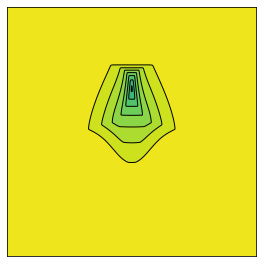

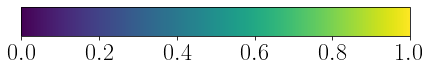

In [8]:
## Set key-frames and subfigure naming
keyframes = []
for j in [1, 2, 3, 4]:
    if (example == 3):
        keyframes.append(int(j*(ns-1)/4))
    else:
        keyframes.append(int(j*(ns-1)/8))
n_keyframes = len(keyframes)
d = dict(enumerate(string.ascii_lowercase, 0))

## Create figure
plt.close()
n_plots = n_modes
fig, ax = plt.subplots()

## Plot keyframes for each mode
for i in range(n_modes):
    for k in keyframes:
        ## Clear out old axis and plot new CDF
        ax.collections = []
        ax.patches = []
        ax.set_aspect(1)
        im = plot_w_frame(ax, k, i)
        ax.tick_params(axis='both', left=False, bottom=False, top = False, right=False, labelleft=False, labelbottom=False)
        plt.tight_layout()

        ## Save figure
        keyframe_num = keyframes.index(k) + 1
        fig.savefig(write_directory + '/' + name + '_' + str(keyframe_num) + d[i] +'.png', dpi=50)

### Plot horizontal colorbar
fig = plt.figure()
ax = fig.add_axes([0.05, 0.80, 0.9, 0.1])
cb = matplotlib.colorbar.ColorbarBase(ax, orientation='horizontal')
cb.ax.tick_params(labelsize=1.5*mathtextsize)
plt.savefig(write_directory + '/colorbar.pdf')